In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE,SelectFromModel

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

%matplotlib inline

In [2]:
bank = pd.read_csv(r'C:\Users\a198199\Desktop\DS and ML\BANK MARKETING\bank-additional\bank-additional-full.csv',delimiter = ";")

bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# EDA & VISUALIZATIONS

Text(0,0.5,'Total Count')

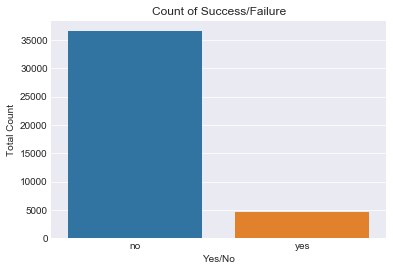

In [3]:
sns.set_style(style='darkgrid')

sns.countplot(x='y',data=bank)
plt.title('Count of Success/Failure')
plt.xlabel('Yes/No')
plt.ylabel('Total Count')

Text(0.5,1,'AGE DISTRIBUTION OF SUCCESSFUL/UNSUCCESSFUL SUBSCRIPTIONS')

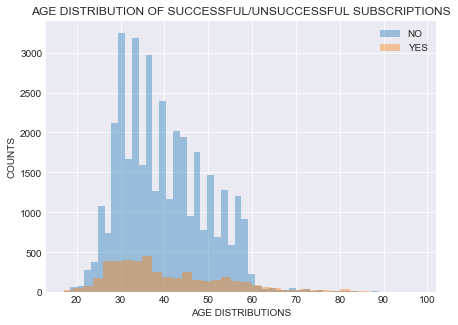

In [4]:
#Distribution of Ages 

plt.figure(figsize=(7,5))
sns.distplot(bank['age'][bank['y'] == 'no'],label = 'NO',kde=False)
sns.distplot(bank['age'][bank['y'] == 'yes'],label = 'YES',kde=False)

plt.xlabel('AGE DISTRIBUTIONS')
plt.ylabel('COUNTS')
plt.legend(loc='best')
plt.title('AGE DISTRIBUTION OF SUCCESSFUL/UNSUCCESSFUL SUBSCRIPTIONS')

Most of the customers contacted were in their late 20's and early 30's

Text(0.5,0,'Job Groups')

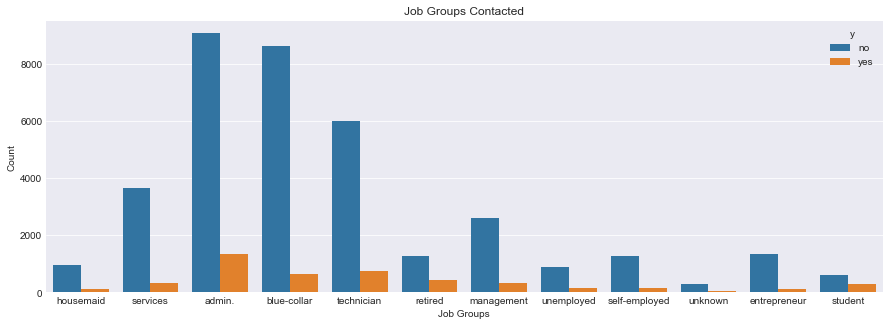

In [5]:
plt.figure(figsize=(15,5))
sns.countplot(x='job',data=bank,hue='y')

plt.title('Job Groups Contacted')
plt.ylabel('Count')
plt.xlabel('Job Groups')

The most contacted job group were Administrators

Text(0.5,0,'Education Level')

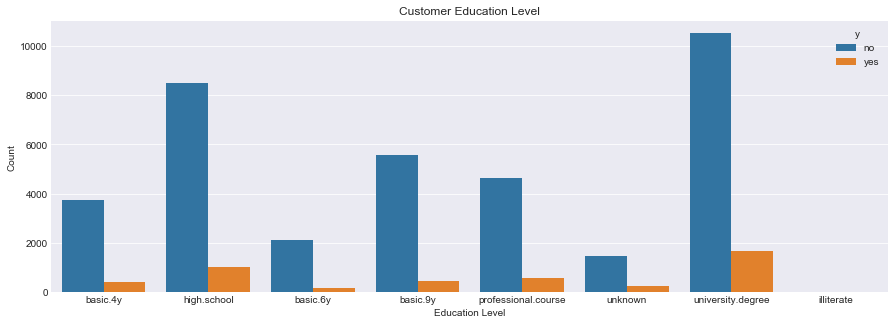

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(x='education',data=bank,hue='y')

plt.title('Customer Education Level')
plt.ylabel('Count')
plt.xlabel('Education Level')

Most of the Customers had University Degrees

In [7]:
#Frequency table

bank.groupby(by=['job','education'])['y'].count()

job           education          
admin.        basic.4y                 77
              basic.6y                151
              basic.9y                499
              high.school            3329
              illiterate                1
              professional.course     363
              university.degree      5753
              unknown                 249
blue-collar   basic.4y               2318
              basic.6y               1426
              basic.9y               3623
              high.school             878
              illiterate                8
              professional.course     453
              university.degree        94
              unknown                 454
entrepreneur  basic.4y                137
              basic.6y                 71
              basic.9y                210
              high.school             234
              illiterate                2
              professional.course     135
              university.degree       610


Administrators with University Degrees were the most contacted group

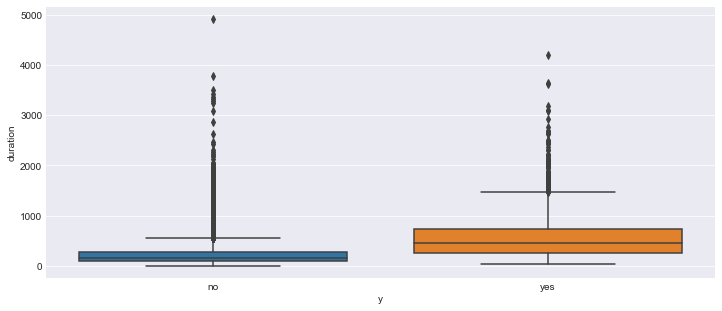

In [8]:
#Boxplot to show Distributions between Call Duration and Success/Failure

plt.figure(figsize=(12,5))
sns.boxplot(x='y',y='duration',data=bank)

In [9]:
bank['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

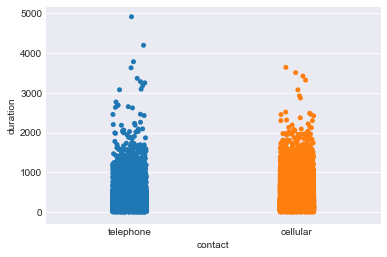

In [10]:
sns.stripplot(x='contact',y='duration',data=bank,jitter=True)

Telephone call durations were higher than Cellular calls

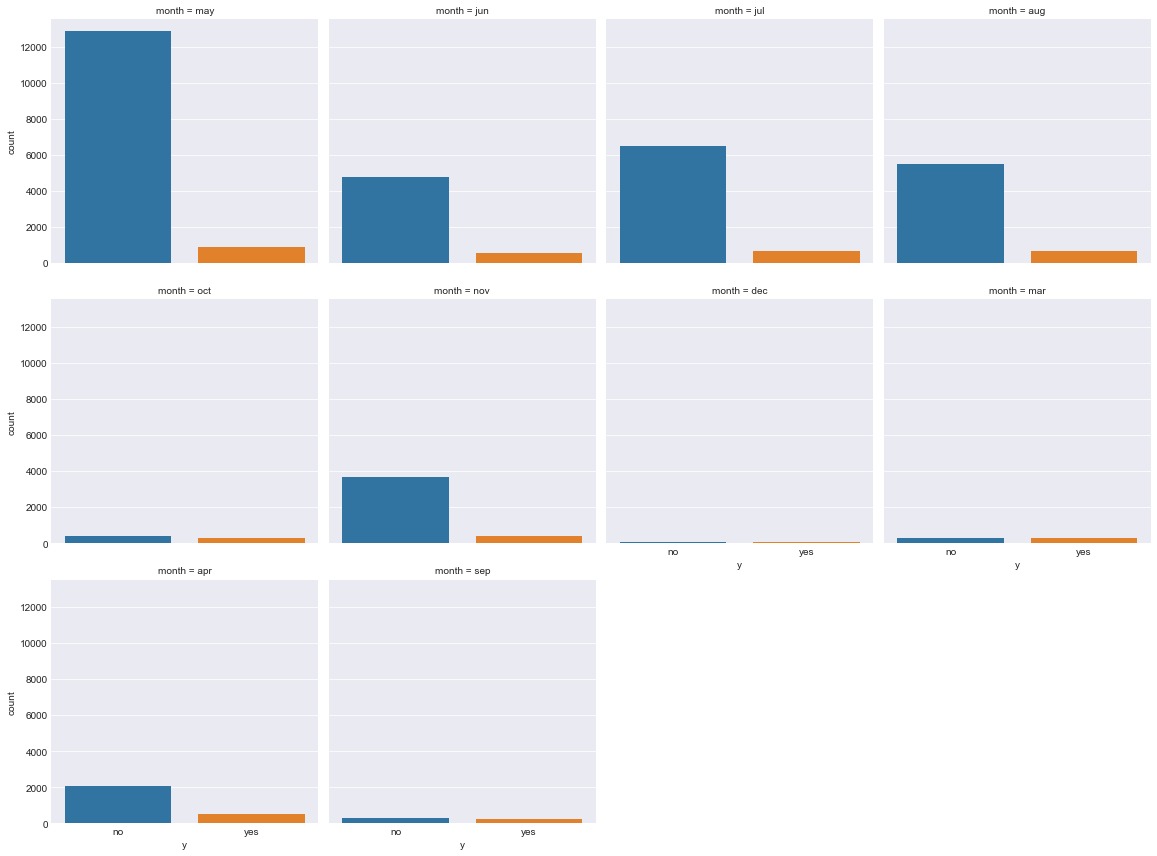

In [11]:
sns.factorplot(x='y',data=bank,col='month',col_wrap=4,kind='count')

Most of the customers were contacted in the month of May

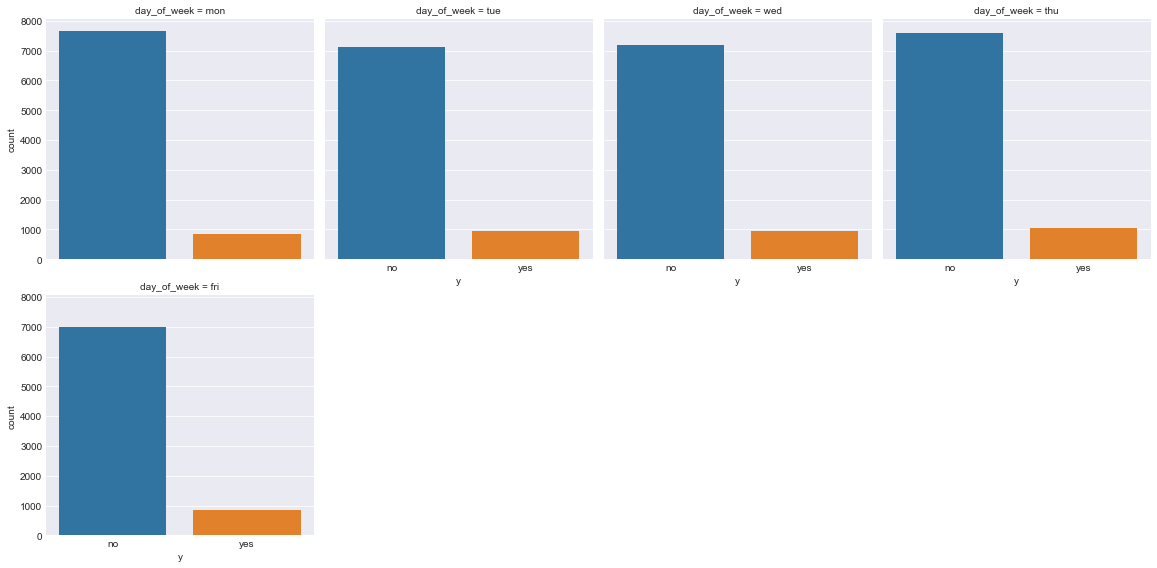

In [12]:
sns.factorplot(x='y',data=bank,col='day_of_week',col_wrap=4,kind='count')

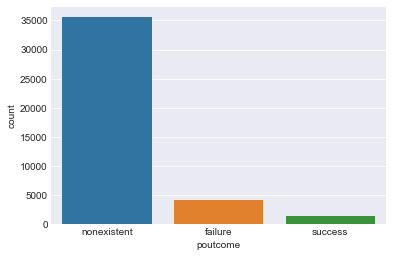

In [13]:
sns.countplot(x='poutcome',data=bank)

# FEATURE ENGINEERING 

FEATURE ENGINEERING

ONE-HOT ENCODING - Turning Categorical variables into Dummy Variables

In [14]:
bank.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [15]:
new_bank = pd.get_dummies(bank,columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month','poutcome', 'y'],drop_first=True).drop('day_of_week',axis=1)

In [16]:
new_bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0


# FEATURE SELECTION AND MODELING

LOGISTIC REGRESSION

In [17]:
print(new_bank.shape)

(41188, 50)


In [18]:
X = new_bank.iloc[:,:49].values

In [19]:
y = np.array(new_bank.y_yes)

In [20]:
print(X.shape)
print(y.shape)

(41188, 49)
(41188,)


In [21]:
'''Recursive feature elimination (RFE) is a feature selection method that fits a model and 
removes the weakest feature (or features) until the specified number of features is reached.'''

logreg = LogisticRegression()

selector = RFE(logreg)

selector = selector.fit(X, y)

logregX = selector.transform(X)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(logregX,y,test_size=0.3,random_state=1000)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28831, 24)
(12357, 24)
(28831,)
(12357,)


In [24]:
y_pred = logreg.fit(X_train,y_train).predict(X_test)

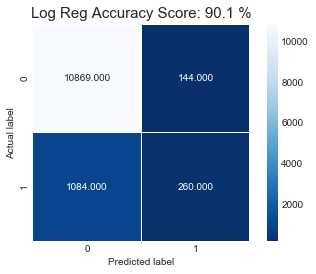

In [25]:
#A complete picture of how our classifier is performing
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Log Reg Accuracy Score: {:2.1f} %'.format(logreg.score(X_test, y_test) * 100)
plt.title(all_sample_title, size = 15);

Logisitic Regression predicted that 260 customers are likely to take up the term-deposit whie 10869 customers would not. The classifier incorrectly predicted the 144 would not take up the term-deposit.

In [26]:
# Classification Metrics Report

print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95     11013
          1       0.64      0.19      0.30      1344

avg / total       0.88      0.90      0.88     12357



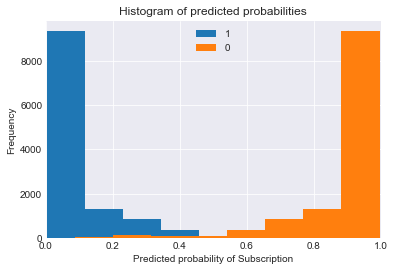

In [27]:
#Predicted probabilities for class 1 
y_pred_prob = logreg.predict_proba(X_test)[:,1]

#Predicted probabilities for class 1
y_pred_prob_zero = logreg.predict_proba(X_test)[:,0]

# histogram of predicted probabilities

plt.hist(y_pred_prob, bins=8,label='1')
plt.hist(y_pred_prob_zero, bins=8,label='0')
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Subscription')
plt.ylabel('Frequency')
plt.legend(loc='best')

Using the Histogram in conjuction with the Classification report, the rate logisitic regression will predict true positives (with a default treshold of 0.5) is marked at 19% as compared to 99% for true negatives.

DECISION TREES

In [28]:
dectree = DecisionTreeClassifier()
dectree.fit(X,y)
model = SelectFromModel(dectree, prefit=True)
dectreeX = model.transform(X)
print(dectreeX.shape)


(41188, 5)


In [29]:
decX_train,decX_test,decy_train,decy_test = train_test_split(dectreeX,y,test_size = 0.3,random_state=1000)

In [30]:
print(decX_train.shape)
print(decX_test.shape)
print(decy_train.shape)
print(decy_test.shape)

(28831, 5)
(12357, 5)
(28831,)
(12357,)


In [31]:
y_pred_dec = dectree.fit(decX_train,y_train).predict(decX_test)

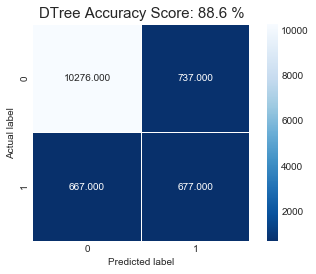

In [32]:
#A complete picture of how our classifier is performing
sns.heatmap(confusion_matrix(y_test,y_pred_dec), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'DTree Accuracy Score: {:2.1f} %'.format(dectree.score(decX_test,decy_test) * 100)
plt.title(all_sample_title, size = 15);

In [33]:
print(classification_report(y_test,y_pred_dec))

             precision    recall  f1-score   support

          0       0.94      0.93      0.94     11013
          1       0.48      0.50      0.49      1344

avg / total       0.89      0.89      0.89     12357



With a Decision Tree, our model will be precise 81% of the time with 89% of the customers subscribing to the term deposit.

Decision Tree predicted that 683 customers are likely to take up the term-deposit whie 10274 customers would not. The classifier incorrectly predicted the 739 would subscribe to the term-deposit.

In [34]:
#import graphviz
#
#dot_data = tree.export_graphviz(dectree,out_file=None,filled=True,rounded=True,
#                               special_characters=True,feature_names =)
#graph = graphviz.Source(dot_data)
##graph.render('bank')
#graph

RANDOM FORESTS

In [35]:
rfclf = RandomForestClassifier()
rfclf.fit(X,y)
rf_model = SelectFromModel(rfclf, prefit=True)
rfX = rf_model.transform(X)
print(rfX.shape)

(41188, 9)


In [36]:
rtX_train,rtX_test,rty_train,rty_test = train_test_split(rfX,y,test_size=0.3,random_state=1000)

In [37]:
print(rtX_train.shape)
print(rtX_test.shape)
print(rty_train.shape)
print(rty_test.shape)

(28831, 9)
(12357, 9)
(28831,)
(12357,)


In [38]:
rf_y_pred =rfclf.fit(rtX_train,rty_train).predict(rtX_test)

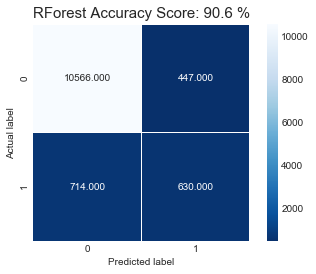

In [39]:
#A complete picture of how our classifier is performing
sns.heatmap(confusion_matrix(rty_test,rf_y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'RForest Accuracy Score: {:2.1f} %'.format(accuracy_score(rty_test,rf_y_pred) * 100)
plt.title(all_sample_title, size = 15);


In [40]:
print(classification_report(rty_test,rf_y_pred))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95     11013
          1       0.58      0.47      0.52      1344

avg / total       0.90      0.91      0.90     12357



With a Random Forest, our model will be precise 90% of the time with 91% of the customers subscribing to the term deposit.

Decision Tree predicted that 665 customers are likely to take up the term-deposit whie 10553 customers would not. The classifier incorrectly predicted the 395 would subscribe to the term-deposit.

In [41]:
scores = {}

scores['Logisitic Regression'] = logreg.score(X_test, y_test)
scores['Decision Trees'] = dectree.score(decX_test,decy_test)
scores['Random Forest'] = accuracy_score(rty_test,rf_y_pred)


scores

{'Decision Trees': 0.8863801893663511,
 'Logisitic Regression': 0.900623128591082,
 'Random Forest': 0.9060451565914057}